# Linear Operator

In [ ]:
# install dprox if your are in online google colab notebook
!pip install dprox

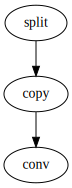

Sanity check passed, diff=0.03125 rel_diff=6.131918439677975e-08
torch.Size([1, 3, 768, 1024])


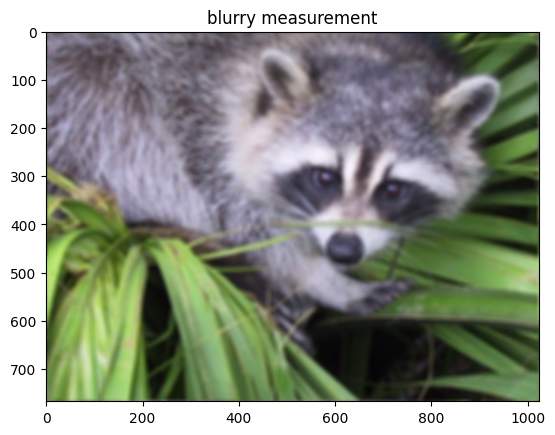

In [1]:
import dprox as dp
from dprox.utils.examples import fspecial_gaussian
from dprox.utils import to_torch_tensor, imshow
from scipy.misc import face

x = dp.Variable()
point_spread_function = fspecial_gaussian(15, 5)
op = dp.conv(x, point_spread_function)

K = dp.CompGraph(op)
K.visualize()
K.sanity_check()  # implementation sanity check (please refer to the supplement D.3 for details)

img = to_torch_tensor(face(), batch=True)
out = K.forward(img)

print(img.shape)
imshow(out, titles=['blurry measurement'])

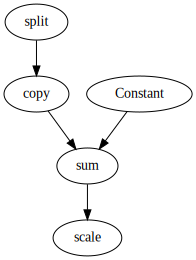

tensor([-3,  0,  3])
[Variable(id=a8f1e456-f9ff-11ed-85a7-154c289835c9, shape=None, value=None)]
[Constant(value=somevalue)]
tensor([-3,  0,  3])
tensor([-6, -6, -6])


In [2]:
import torch

x = dp.Variable()
y = 3 * (x - torch.tensor([2, 2, 2]))

K = dp.CompGraph(y)
K.visualize()

input = torch.tensor([1, 2, 3])
print(dp.eval(y, input, zero_out_constant=False))

print(y.variables)
print(y.constants)

x.value = torch.tensor([1, 2, 3])
print(y.value)
print(y.offset)

Sanity check passed, diff=0.03125 rel_diff=6.142241204543097e-08
torch.Size([1, 3, 768, 1024])


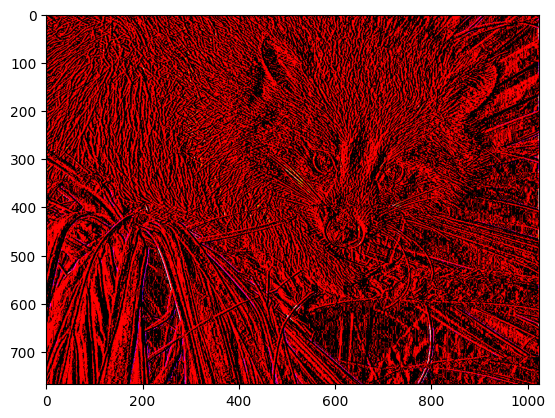

In [3]:

x = dp.Variable()
K = dp.CompGraph(dp.grad(x, dim=1) + dp.grad(x, dim=2))
K.sanity_check()
img = to_torch_tensor(face(), batch=True)
print(img.shape)
outputs = K.forward(img)
imshow(outputs*255)

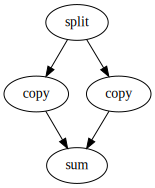

tensor([[-0.4239,  0.6196, -1.0583, -0.1731],
        [ 0.2151,  2.2587, -0.3051, -0.6055],
        [-0.8650,  0.8931,  2.8935,  0.3446],
        [ 0.2141, -1.3626, -0.0908,  1.9159]], grad_fn=<AddBackward0>)
tensor([[0.2500, 0.2500, 0.2500, 0.2500],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000]])


In [4]:

x1 = dp.Variable()
x2 = dp.Variable()

K = dp.CompGraph(x1 + x2)
K.visualize()

v1 = torch.randn((4, 4), requires_grad=True)
v2 = torch.randn((4, 4))

outputs = K.forward(v1, v2)

print(outputs)

loss = torch.mean(outputs[0])
loss.backward()
print(v1.grad)

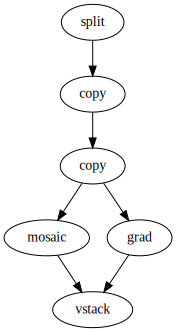

torch.Size([1, 3, 768, 1024])
torch.Size([1, 3, 768, 1024])


In [5]:
x = dp.Variable()
K = dp.CompGraph(dp.vstack([dp.mosaic(x), dp.grad(x)]))

K.visualize()

img = to_torch_tensor(face(), batch=True)
print(img.shape)

outputs = K.forward(img)
inputs = K.adjoint(outputs)
print(inputs.shape)
# K.sanity_check()

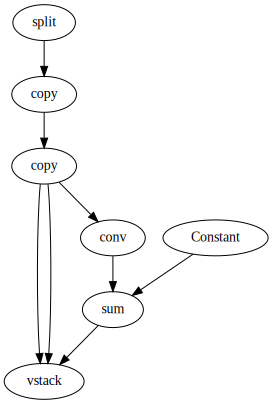

In [6]:
from dprox import *
from dprox.utils import *
from dprox.utils import examples

img = examples.sample('face')
psf = examples.point_spread_function(15, 5)
b = examples.blurring(img, psf)

x = Variable()
data_term = sum_squares(conv(x, psf) - b)
reg_term = deep_prior(x, denoiser='ffdnet_color')
reg2 = nonneg(x)
K = CompGraph(vstack([fn.linop for fn in [data_term, reg_term, reg2]]))
K.visualize()